# **Simulation of Mouse Brain Network**

In [1]:
%reload_ext autoreload
%autoreload 2

from MBN_Res_Constrn import MBN_RC
import matplotlib.pyplot as plt
import numpy as np

# **Simulation**

In [4]:
mbn = MBN_RC(nepochs=40000,
             dt=0.05,
             lambda_o=2.89,
             alpha=0.01,
             beta=0.002,
             plot_bifurcation=False)
mbn.run_model()

/content/mb_communities.npz already exists
DataUtils initialized
Average shortest path length:  2.1057608395470866
Avg clustering coefficient:  0.37852781810835767
LAMBDA_O=2.89, Global Order(R)=0.0751384150108957
LAMBDA_O=2.89, Global Order(R)=0.0854969602190389
LAMBDA_O=2.89, Global Order(R)=0.025633027918873123
LAMBDA_O=2.89, Global Order(R)=0.27225753601211555
LAMBDA_O=2.89, Global Order(R)=0.5044574678239325
LAMBDA_O=2.89, Global Order(R)=0.4882237110809283
LAMBDA_O=2.89, Global Order(R)=0.52822256563625
LAMBDA_O=2.89, Global Order(R)=0.5054545467860297
LAMBDA_O=2.89, Global Order(R)=0.5638092589240953
LAMBDA_O=2.89, Global Order(R)=0.49696305725729606
LAMBDA_O=2.89, Global Order(R)=0.5698033545812837
LAMBDA_O=2.89, Global Order(R)=0.4636426202458609
LAMBDA_O=2.89, Global Order(R)=0.4775408021046358
LAMBDA_O=2.89, Global Order(R)=0.5421554496930342
LAMBDA_O=2.89, Global Order(R)=0.5123762033495963
LAMBDA_O=2.89, Global Order(R)=0.47228674844271856
LAMBDA_O=2.89, Global Order(R)=0.

# **Plot: Time vs Global Synchrony**


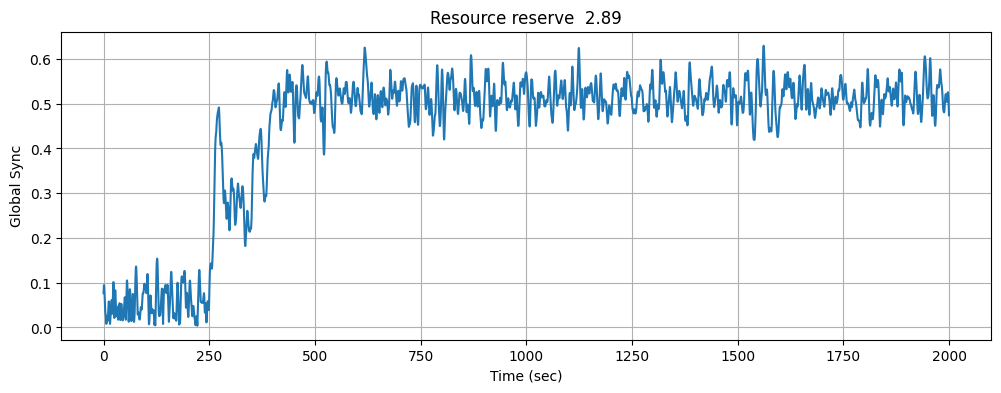

In [5]:
f = plt.figure(figsize=(12, 4))
plt.title("Resource reserve  " + str(mbn.LAMBDA_O))
plt.plot(np.linspace(0, mbn.NEPOCHS-1, mbn.NEPOCHS)*mbn.DT, mbn.GLOBAL_ORDER_VERBOSE)
plt.ylabel("Global Sync")
plt.xlabel("Time (sec)")
plt.grid()
plt.show()

# **Print number of transitions in a simulation**

In [6]:
mbn.transition_count()

Total transitions: 276


# **Print duration of each transitions observed**



In [7]:
mbn.transition_time()
time=mbn.tTime

Transition Time for Transition 1: 23.00 sec
Transition Time for Transition 2: 35.00 sec
Transition Time for Transition 3: 52.00 sec
Transition Time for Transition 4: 77.00 sec
Transition Time for Transition 5: 49.00 sec
Transition Time for Transition 6: 41.00 sec
Transition Time for Transition 7: 33.00 sec
Transition Time for Transition 8: 60.00 sec
Transition Time for Transition 9: 42.00 sec
Transition Time for Transition 10: 101.00 sec
Transition Time for Transition 11: 57.00 sec
Transition Time for Transition 12: 55.00 sec
Transition Time for Transition 13: 65.00 sec
Transition Time for Transition 14: 97.00 sec
Transition Time for Transition 15: 25.00 sec
Transition Time for Transition 16: 65.00 sec
Transition Time for Transition 17: 65.00 sec
Transition Time for Transition 18: 58.00 sec
Transition Time for Transition 19: 12.00 sec
Transition Time for Transition 20: 54.00 sec
Transition Time for Transition 21: 73.00 sec
Transition Time for Transition 22: 31.00 sec
Transition Time fo

##**Plot: Box plot for transition time observed in a single experiment**

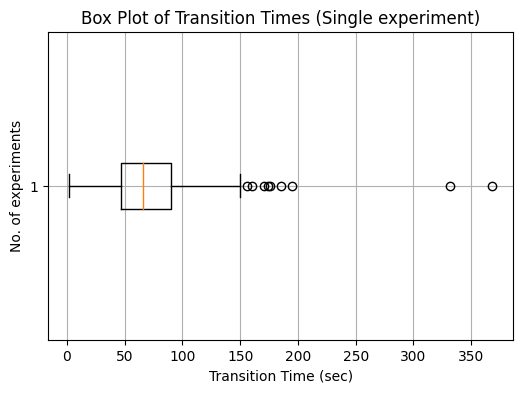

In [8]:
plt.figure(figsize=(6, 4))
plt.boxplot(time, vert=False)
plt.xlabel('Transition Time (sec)')
plt.ylabel('No. of experiments')
plt.title('Box Plot of Transition Times (Single experiment)')
plt.grid(True)
plt.show()

##**All transitions in a single plot**

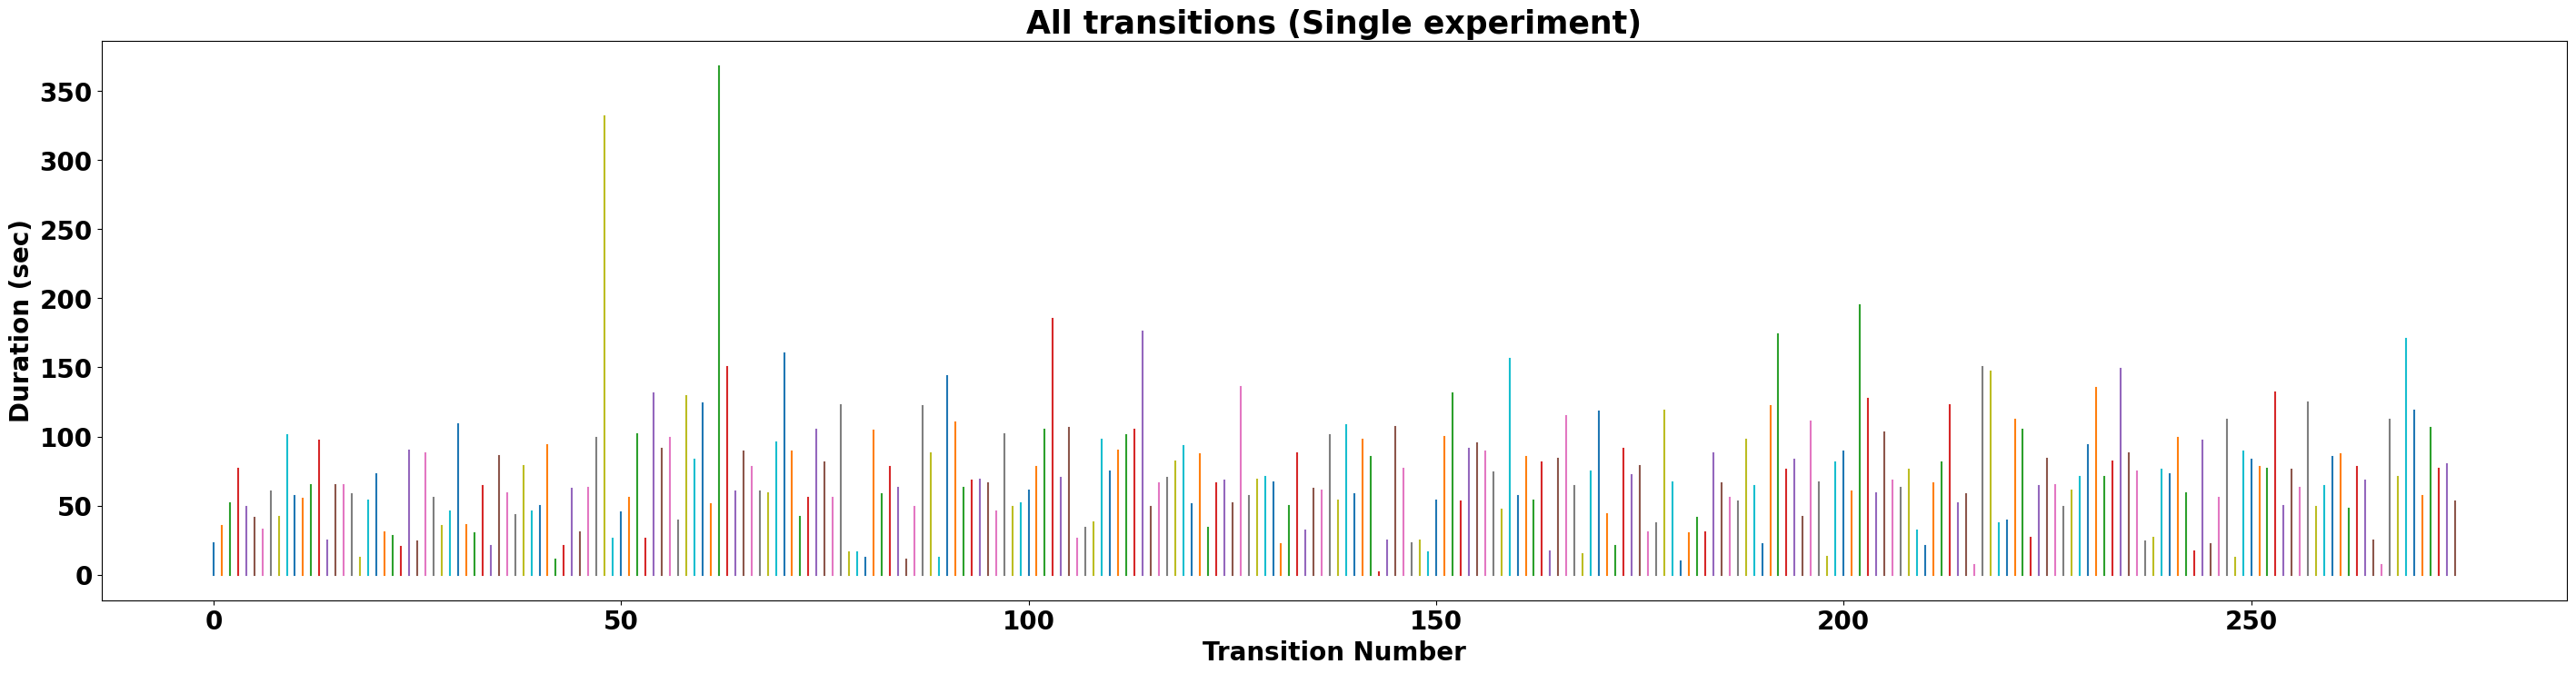

In [9]:
plt.figure(figsize=(35, 8))
for i, duration in enumerate(time):
    plt.plot([i, i], [0, duration])
ax=plt.gca()
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(20)
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(20)
plt.xlabel('Transition Number', fontsize=20, fontweight='bold')
plt.ylabel('Duration (sec)', fontsize=20, fontweight='bold')
plt.title('All transitions (Single experiment)', fontsize=25, fontweight='bold')
plt.show()

 ## **A box plot showing both number of transitions and transition time across all simulations**

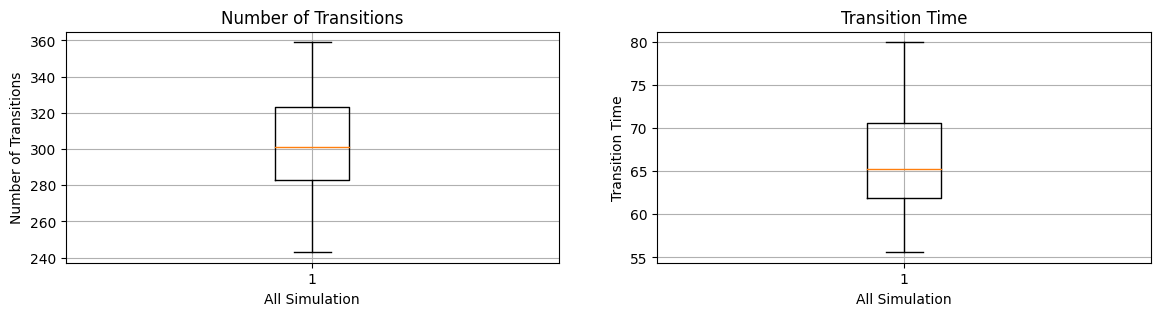

In [10]:
#Each simulation ran five times with the same initial conditions, and different observations were found each time.
#Transition count from simulations with different initial conditions.
transitions = [
    [311,359,336,281,326,
    243,283,301,309,327,
    317,323,281,280,289,
    270,331,323,294,283,
    283,281,319,333,291]
]
#Corresponding transition times from simulations with different initial conditions.
transition_time = [
    [64.66, 55.60,59.17,72.32, 61.18,
    79.95,70.53,67.06,64.39,61.85,
    65.05,60.69,68.63,72.24,70.19,
    73.33,60.73,62.34,65.24,71.73,
    69.15,71.17,63.12,61.70,68.52]
]

plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
plt.boxplot(transitions)
plt.xlabel('All Simulation')
plt.ylabel('Number of Transitions')
plt.title('Number of Transitions')
plt.grid()

plt.subplot(1, 2, 2)
plt.boxplot(transition_time)
plt.xlabel('All Simulation')
plt.ylabel('Transition Time')
plt.title('Transition Time')
plt.grid()
plt.show()

##**Box plot showing both number of transitions and transition time across all simulations after removing certain nodes in the network.**

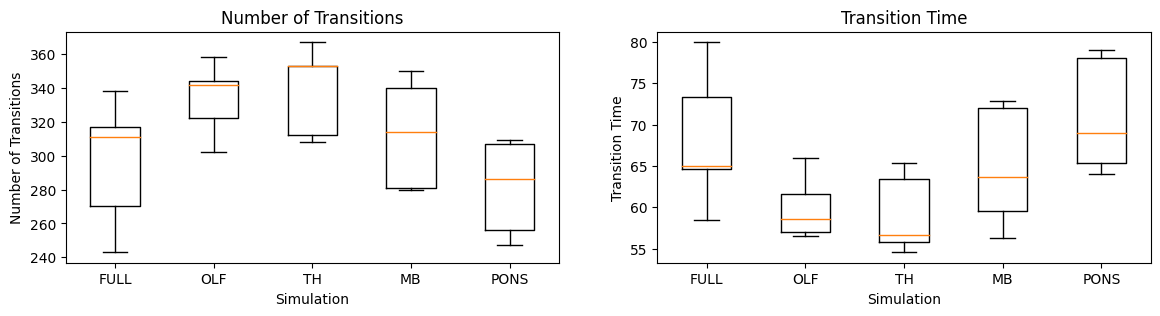

In [11]:

transitions = [
    [311,243,317,270,338], #FULL
    [344,302,358,322,342], #OLF
    [308,353,367,312,353], #TH
    [350,280,340,281,314], #MB
    [309,286,247,307,256], #PONS
]

transition_time = [
    [64.66,79.95,65.05,73.33,58.46],   #FULL
    [57.00,65.97,56.58,61.58,58.63],   #OLF
    [65.32,56.60,54.57,63.40,55.81],   #TH
    [56.29,72.84,59.57,71.99,63.67],   #MB
    [64.05,68.98,79.04,65.31,78.03],   #PONS
]
param=['FULL','OLF','TH','MB','PONS']
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
plt.boxplot(transitions,labels=param)
plt.xlabel('Simulation')
plt.ylabel('Number of Transitions')
plt.title('Number of Transitions')

plt.subplot(1, 2, 2)
plt.boxplot(transition_time,labels=param)
plt.xlabel('Simulation')
plt.ylabel('Transition Time')
plt.title('Transition Time')
plt.show()